In [1]:
# Grompp: Creating portable binary run file for mdrun
from biobb_md.gromacs.grompp import grompp

In [2]:
output_genion_gro = "../files/CHEMBL126/SDHA_CHEMBL126_genion.gro"
output_genion_top_zip = "../files/CHEMBL126/SDHA_CHEMBL126_genion_top.zip"

In [3]:
ligandCode = "CHEMBL126"
pdbCode = "SDHA"

In [5]:
output_gppmin_tpr = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_gppmin.tpr"


In [6]:


# Create prop dict and inputs/outputs
prop = {
    'mdp':{
        'nsteps':'5000',
        'emstep': 0.01,
        'emtol':'500'
    },
    'simulation_type':'minimization'
}

# Create and launch bb
grompp(input_gro_path=output_genion_gro,
       input_top_zip_path=output_genion_top_zip,
       output_tpr_path=output_gppmin_tpr,
       properties=prop)

2021-09-08 12:44:17,922 [MainThread  ] [INFO ]  GROMACS Grompp 20191 version detected
2021-09-08 12:44:17,937 [MainThread  ] [INFO ]  Extracting: /home/didier/Documents/BARRADD_Things/SDHA_CADD/files/CHEMBL126/SDHA_CHEMBL126_genion_top.zip
2021-09-08 12:44:17,938 [MainThread  ] [INFO ]  to:
2021-09-08 12:44:17,938 [MainThread  ] [INFO ]  ['e697d2b0-9230-430d-988e-8b85ba259378/CHEMBL126_params.itp', 'e697d2b0-9230-430d-988e-8b85ba259378/CHEMBL126_posres.itp', 'e697d2b0-9230-430d-988e-8b85ba259378/ligand.top', 'e697d2b0-9230-430d-988e-8b85ba259378/p2g_Protein_chain_A.itp', 'e697d2b0-9230-430d-988e-8b85ba259378/p2g_Protein_chain_B.itp', 'e697d2b0-9230-430d-988e-8b85ba259378/posre_Protein_chain_A.itp', 'e697d2b0-9230-430d-988e-8b85ba259378/posre_Protein_chain_B.itp']
2021-09-08 12:44:17,939 [MainThread  ] [INFO ]  Unzipping: 
2021-09-08 12:44:17,940 [MainThread  ] [INFO ]  ../files/CHEMBL126/SDHA_CHEMBL126_genion_top.zip
2021-09-08 12:44:17,941 [MainThread  ] [INFO ]  To: 
2021-09-08 12:44

0

In [9]:
# Mdrun: Running minimization
from biobb_md.gromacs.mdrun import mdrun

In [7]:
# Create prop dict and inputs/outputs
output_min_trr = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_min.trr"
output_min_gro = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_min.gro"
output_min_edr = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_min.edr"
output_min_log = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_min.log"

In [10]:
%%time
# Create and launch bb
mdrun(input_tpr_path=output_gppmin_tpr,
      output_trr_path=output_min_trr, 
      output_gro_path=output_min_gro,
      output_edr_path=output_min_edr, 
      output_log_path=output_min_log)

2021-09-08 12:47:43,258 [MainThread  ] [INFO ]  GROMACS Mdrun 20191 version detected
2021-09-08 12:47:43,260 [MainThread  ] [INFO ]  Not using any container
2021-09-08 13:18:38,203 [MainThread  ] [INFO ]  gmx -nobackup -nocopyright mdrun -s ../files/CHEMBL126/SDHA_CHEMBL126_gppmin.tpr -o ../files/CHEMBL126/SDHA_CHEMBL126_min.trr -c ../files/CHEMBL126/SDHA_CHEMBL126_min.gro -e ../files/CHEMBL126/SDHA_CHEMBL126_min.edr -g ../files/CHEMBL126/SDHA_CHEMBL126_min.log

2021-09-08 13:18:38,204 [MainThread  ] [INFO ]  Exit code 0

2021-09-08 13:18:38,205 [MainThread  ] [INFO ]                        :-) GROMACS - gmx mdrun, 2019.1 (-:

Executable:   /home/didier/anaconda3/envs/biobb_Protein-Complex_MDsetup_tutorial/bin/gmx
Data prefix:  /home/didier/anaconda3/envs/biobb_Protein-Complex_MDsetup_tutorial
Working dir:  /home/didier/Documents/BARRADD_Things/SDHA_CADD/notebooks
Command line:
  gmx -nobackup -nocopyright mdrun -s ../files/CHEMBL126/SDHA_CHEMBL126_gppmin.tpr -o ../files/CHEMBL126/SDHA

0

In [11]:
# GMXEnergy: Getting system energy by time  
from biobb_analysis.gromacs.gmx_energy import gmx_energy

# Create prop dict and inputs/outputs
output_min_ene_xvg = pdbCode+'_'+ligandCode+'_min_ene.xvg'
prop = {
    'terms':  ["Potential"]
}

# Create and launch bb
gmx_energy(input_energy_path=output_min_edr, 
          output_xvg_path=output_min_ene_xvg, 
          properties=prop)

2021-09-08 13:48:41,953 [MainThread  ] [INFO ]  Not using any container
2021-09-08 13:48:41,984 [MainThread  ] [INFO ]  gmx energy -f /home/didier/Documents/BARRADD_Things/SDHA_CADD/notebooks/../files/CHEMBL126/SDHA_CHEMBL126_min.edr -o SDHA_CHEMBL126_min_ene.xvg -xvg none < 3ca6037d-bf6e-4b96-a8a1-aba9b70aa737/instructions.in

2021-09-08 13:48:41,986 [MainThread  ] [INFO ]  Exit code 0

2021-09-08 13:48:41,987 [MainThread  ] [INFO ]  
Statistics over 4943 steps [ 0.0000 through 4942.0000 ps ], 1 data sets
All statistics are over 3913 points (frames)

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Potential                -2.61011e+06      31000    83827.9    -198382  (kJ/mol)

2021-09-08 13:48:41,987 [MainThread  ] [INFO ]                        :-) GROMACS - gmx energy, 2019.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Baue

0

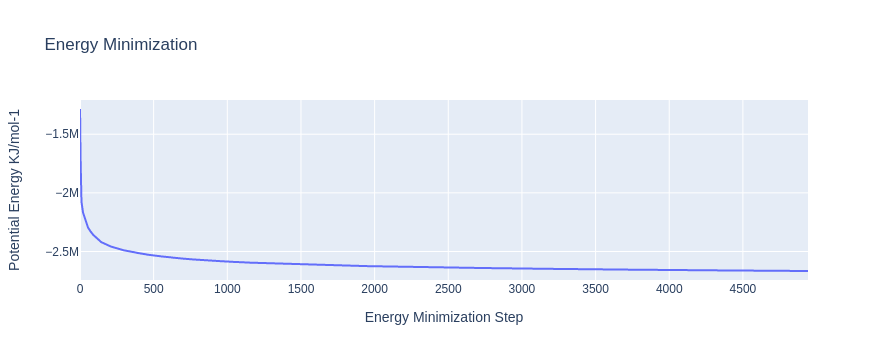

In [12]:
import plotly
import plotly.graph_objs as go

#Read data from file and filter energy values higher than 1000 Kj/mol^-1
with open(output_min_ene_xvg,'r') as energy_file:
    x,y = map(
        list,
        zip(*[
            (float(line.split()[0]),float(line.split()[1]))
            for line in energy_file 
            if not line.startswith(("#","@")) 
            if float(line.split()[1]) < 1000 
        ])
    )

plotly.offline.init_notebook_mode(connected=True)

fig = ({
    "data": [go.Scatter(x=x, y=y)],
    "layout": go.Layout(title="Energy Minimization",
                        xaxis=dict(title = "Energy Minimization Step"),
                        yaxis=dict(title = "Potential Energy KJ/mol-1")
                       )
})

plotly.offline.iplot(fig)

In [16]:
# MakeNdx: Creating index file with a new group (protein-ligand complex)

from biobb_md.gromacs.make_ndx import make_ndx


In [13]:
# output_complex_ndx = pdbCode+'_'+ligandCode+'_index.ndx'
output_complex_ndx = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_index.ndx"

In [14]:
# Create prop dict and inputs/outputs
prop = {
    'selection': "\"Protein\"|\"Other\"" 
}

In [17]:
# Create and launch bb
make_ndx(input_structure_path=output_min_gro,
        output_ndx_path=output_complex_ndx,
        properties=prop)

2021-09-08 13:54:50,069 [MainThread  ] [INFO ]  GROMACS MakeNdx 20191 version detected
2021-09-08 13:54:50,070 [MainThread  ] [INFO ]  Not using any container
2021-09-08 13:54:50,725 [MainThread  ] [INFO ]  echo -e '"Protein"|"Other"\nq' | gmx -nobackup -nocopyright make_ndx -f ../files/CHEMBL126/SDHA_CHEMBL126_min.gro -o ../files/CHEMBL126/SDHA_CHEMBL126_index.ndx

2021-09-08 13:54:50,726 [MainThread  ] [INFO ]  Exit code 0

2021-09-08 13:54:50,727 [MainThread  ] [INFO ]  Going to read 0 old index file(s)
Analysing residue names:
There are:   590    Protein residues
There are:     1      Other residues
There are: 46625      Water residues
There are:    97        Ion residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...

  0 System              : 149265 atoms
  1 Protein             :  9249 atoms
  2 Protein-H           :  4647 atoms
  

0

In [21]:
# Create prop dict and inputs/outputs
# output_gppnvt_tpr = pdbCode+'_'+ligandCode+'gppnvt.tpr'
output_gppnvt_tpr = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_gppnvt.tpr"

In [18]:
posresifdef = "POSRES_"+ligandCode.upper()

In [19]:
prop = {
    'mdp':{
        'nsteps':'5000',
        'tc-grps': 'Protein_Other Water_and_ions',
        'Define': '-DPOSRES -D' + posresifdef
    },
    'simulation_type':'nvt'
}

In [22]:
# Create and launch bb
grompp(input_gro_path=output_min_gro,
       input_top_zip_path=output_genion_top_zip,
       input_ndx_path=output_complex_ndx,
       output_tpr_path=output_gppnvt_tpr,
       properties=prop)

2021-09-08 13:59:56,188 [MainThread  ] [INFO ]  GROMACS Grompp 20191 version detected
2021-09-08 13:59:56,204 [MainThread  ] [INFO ]  Extracting: /home/didier/Documents/BARRADD_Things/SDHA_CADD/files/CHEMBL126/SDHA_CHEMBL126_genion_top.zip
2021-09-08 13:59:56,205 [MainThread  ] [INFO ]  to:
2021-09-08 13:59:56,206 [MainThread  ] [INFO ]  ['c3066802-d8fa-4bf8-bd84-751e490ae9b1/CHEMBL126_params.itp', 'c3066802-d8fa-4bf8-bd84-751e490ae9b1/CHEMBL126_posres.itp', 'c3066802-d8fa-4bf8-bd84-751e490ae9b1/ligand.top', 'c3066802-d8fa-4bf8-bd84-751e490ae9b1/p2g_Protein_chain_A.itp', 'c3066802-d8fa-4bf8-bd84-751e490ae9b1/p2g_Protein_chain_B.itp', 'c3066802-d8fa-4bf8-bd84-751e490ae9b1/posre_Protein_chain_A.itp', 'c3066802-d8fa-4bf8-bd84-751e490ae9b1/posre_Protein_chain_B.itp']
2021-09-08 13:59:56,206 [MainThread  ] [INFO ]  Unzipping: 
2021-09-08 13:59:56,208 [MainThread  ] [INFO ]  ../files/CHEMBL126/SDHA_CHEMBL126_genion_top.zip
2021-09-08 13:59:56,208 [MainThread  ] [INFO ]  To: 
2021-09-08 13:59

0

In [23]:
# Create prop dict and inputs/outputs
output_nvt_trr = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_nvt.trr"
output_nvt_gro = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_nvt.gro"
output_nvt_edr = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_nvt.edr"
output_nvt_log = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_nvt.log"
output_nvt_cpt = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_nvt.cpt"


In [24]:
%%time
mdrun(input_tpr_path=output_gppnvt_tpr,
      output_trr_path=output_nvt_trr,
      output_gro_path=output_nvt_gro,
      output_edr_path=output_nvt_edr,
      output_log_path=output_nvt_log,
      output_cpt_path=output_nvt_cpt)

2021-09-08 14:17:47,195 [MainThread  ] [INFO ]  GROMACS Mdrun 20191 version detected
2021-09-08 14:17:47,196 [MainThread  ] [INFO ]  Not using any container
2021-09-08 14:37:18,955 [MainThread  ] [INFO ]  gmx -nobackup -nocopyright mdrun -s ../files/CHEMBL126/SDHA_CHEMBL126_gppnvt.tpr -o ../files/CHEMBL126/SDHA_CHEMBL126_nvt.trr -c ../files/CHEMBL126/SDHA_CHEMBL126_nvt.gro -e ../files/CHEMBL126/SDHA_CHEMBL126_nvt.edr -g ../files/CHEMBL126/SDHA_CHEMBL126_nvt.log -cpo ../files/CHEMBL126/SDHA_CHEMBL126_nvt.cpt

2021-09-08 14:37:18,956 [MainThread  ] [INFO ]  Exit code 0

2021-09-08 14:37:18,957 [MainThread  ] [INFO ]                        :-) GROMACS - gmx mdrun, 2019.1 (-:

Executable:   /home/didier/anaconda3/envs/biobb_Protein-Complex_MDsetup_tutorial/bin/gmx
Data prefix:  /home/didier/anaconda3/envs/biobb_Protein-Complex_MDsetup_tutorial
Working dir:  /home/didier/Documents/BARRADD_Things/SDHA_CADD/notebooks
Command line:
  gmx -nobackup -nocopyright mdrun -s ../files/CHEMBL126/SDHA_

0

In [25]:
# Create prop dict and inputs/outputs
output_nvt_temp_xvg = pdbCode+'_'+ligandCode+'_nvt_temp.xvg'
prop = {
    'terms':  ["Temperature"]
}

# Create and launch bb
gmx_energy(input_energy_path=output_nvt_edr, 
          output_xvg_path=output_nvt_temp_xvg, 
          properties=prop)

2021-09-08 14:38:58,574 [MainThread  ] [INFO ]  Not using any container
2021-09-08 14:38:58,591 [MainThread  ] [INFO ]  gmx energy -f /home/didier/Documents/BARRADD_Things/SDHA_CADD/notebooks/../files/CHEMBL126/SDHA_CHEMBL126_nvt.edr -o SDHA_CHEMBL126_nvt_temp.xvg -xvg none < a87d33b5-1de6-4e7f-9941-e11c1d045aac/instructions.in

2021-09-08 14:38:58,593 [MainThread  ] [INFO ]  Exit code 0

2021-09-08 14:38:58,593 [MainThread  ] [INFO ]  
Statistics over 5001 steps [ 0.0000 through 10.0000 ps ], 1 data sets
All statistics are over 51 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Temperature                 297.746        2.1    10.2116    11.3555  (K)

2021-09-08 14:38:58,594 [MainThread  ] [INFO ]                        :-) GROMACS - gmx energy, 2019.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. B

0

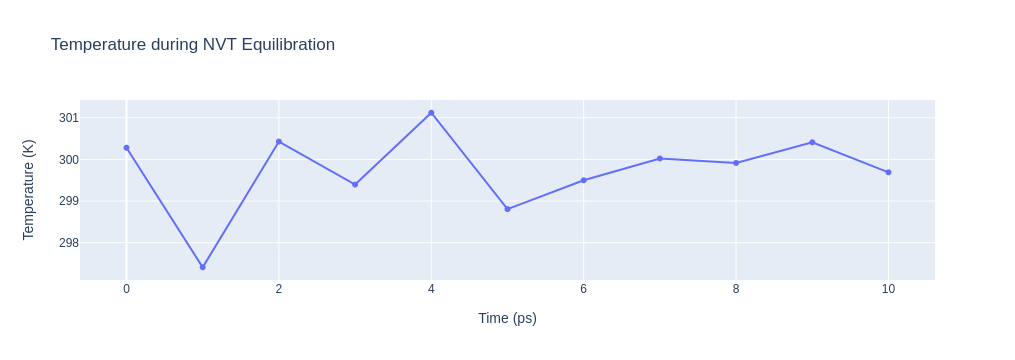

In [26]:
# Read temperature data from file 
with open(output_nvt_temp_xvg,'r') as temperature_file:
    x,y = map(
        list,
        zip(*[
            (float(line.split()[0]),float(line.split()[1]))
            for line in temperature_file 
            if not line.startswith(("#","@")) 
        ])
    )

plotly.offline.init_notebook_mode(connected=True)

fig = ({
    "data": [go.Scatter(x=x, y=y)],
    "layout": go.Layout(title="Temperature during NVT Equilibration",
                        xaxis=dict(title = "Time (ps)"),
                        yaxis=dict(title = "Temperature (K)")
                       )
})

plotly.offline.iplot(fig)

In [27]:
# Create prop dict and inputs/outputs
output_gppnpt_tpr = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_gppnpt.tpr"
# output_gppnpt_tpr = pdbCode+'_'+ligandCode+'_gppnpt.tpr'

In [28]:
prop = {
    'mdp':{
        'type': 'npt',
        'nsteps':'5000',
        'tc-grps': 'Protein_Other Water_and_ions',
        'Define': '-DPOSRES -D' + posresifdef
    },
    'simulation_type':'npt'
}

In [29]:
# Create and launch bb
grompp(input_gro_path=output_nvt_gro,
       input_top_zip_path=output_genion_top_zip,
       input_ndx_path=output_complex_ndx,
       output_tpr_path=output_gppnpt_tpr,
       input_cpt_path=output_nvt_cpt,
       properties=prop)

2021-09-08 14:41:08,634 [MainThread  ] [INFO ]  GROMACS Grompp 20191 version detected
2021-09-08 14:41:08,648 [MainThread  ] [INFO ]  Extracting: /home/didier/Documents/BARRADD_Things/SDHA_CADD/files/CHEMBL126/SDHA_CHEMBL126_genion_top.zip
2021-09-08 14:41:08,649 [MainThread  ] [INFO ]  to:
2021-09-08 14:41:08,650 [MainThread  ] [INFO ]  ['f57394bc-3c4a-4ad6-bb7e-0285535c9cef/CHEMBL126_params.itp', 'f57394bc-3c4a-4ad6-bb7e-0285535c9cef/CHEMBL126_posres.itp', 'f57394bc-3c4a-4ad6-bb7e-0285535c9cef/ligand.top', 'f57394bc-3c4a-4ad6-bb7e-0285535c9cef/p2g_Protein_chain_A.itp', 'f57394bc-3c4a-4ad6-bb7e-0285535c9cef/p2g_Protein_chain_B.itp', 'f57394bc-3c4a-4ad6-bb7e-0285535c9cef/posre_Protein_chain_A.itp', 'f57394bc-3c4a-4ad6-bb7e-0285535c9cef/posre_Protein_chain_B.itp']
2021-09-08 14:41:08,650 [MainThread  ] [INFO ]  Unzipping: 
2021-09-08 14:41:08,651 [MainThread  ] [INFO ]  ../files/CHEMBL126/SDHA_CHEMBL126_genion_top.zip
2021-09-08 14:41:08,651 [MainThread  ] [INFO ]  To: 
2021-09-08 14:41

0

In [30]:
# Create prop dict and inputs/outputs
output_npt_trr = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_npt.trr"
output_npt_gro = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_npt.gro"
output_npt_edr = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_npt.edr"
output_npt_log = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_npt.log"
output_npt_cpt = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_npt.cpt"

In [32]:
%%time
# Create and launch bb
mdrun(input_tpr_path=output_gppnpt_tpr,
      output_trr_path=output_npt_trr,
      output_gro_path=output_npt_gro,
      output_edr_path=output_npt_edr,
      output_log_path=output_npt_log,
      output_cpt_path=output_npt_cpt)

2021-09-08 14:43:04,253 [MainThread  ] [INFO ]  GROMACS Mdrun 20191 version detected
2021-09-08 14:43:04,254 [MainThread  ] [INFO ]  Not using any container
2021-09-08 15:02:45,318 [MainThread  ] [INFO ]  gmx -nobackup -nocopyright mdrun -s ../files/CHEMBL126/SDHA_CHEMBL126_gppnpt.tpr -o ../files/CHEMBL126/SDHA_CHEMBL126_npt.trr -c ../files/CHEMBL126/SDHA_CHEMBL126_npt.gro -e ../files/CHEMBL126/SDHA_CHEMBL126_npt.edr -g ../files/CHEMBL126/SDHA_CHEMBL126_npt.log -cpo ../files/CHEMBL126/SDHA_CHEMBL126_npt.cpt

2021-09-08 15:02:45,320 [MainThread  ] [INFO ]  Exit code 0

2021-09-08 15:02:45,320 [MainThread  ] [INFO ]                        :-) GROMACS - gmx mdrun, 2019.1 (-:

Executable:   /home/didier/anaconda3/envs/biobb_Protein-Complex_MDsetup_tutorial/bin/gmx
Data prefix:  /home/didier/anaconda3/envs/biobb_Protein-Complex_MDsetup_tutorial
Working dir:  /home/didier/Documents/BARRADD_Things/SDHA_CADD/notebooks
Command line:
  gmx -nobackup -nocopyright mdrun -s ../files/CHEMBL126/SDHA_

0

In [33]:
# Create prop dict and inputs/outputs
output_npt_pd_xvg = pdbCode+'_'+ligandCode+'_npt_PD.xvg'
prop = {
    'terms':  ["Pressure","Density"]
}

# Create and launch bb
gmx_energy(input_energy_path=output_npt_edr, 
          output_xvg_path=output_npt_pd_xvg, 
          properties=prop)

2021-09-08 15:03:11,811 [MainThread  ] [INFO ]  Not using any container
2021-09-08 15:03:11,826 [MainThread  ] [INFO ]  gmx energy -f /home/didier/Documents/BARRADD_Things/SDHA_CADD/notebooks/../files/CHEMBL126/SDHA_CHEMBL126_npt.edr -o SDHA_CHEMBL126_npt_PD.xvg -xvg none < 207f9dde-f9b5-4bd2-8a06-bf510f4834ff/instructions.in

2021-09-08 15:03:11,828 [MainThread  ] [INFO ]  Exit code 0

2021-09-08 15:03:11,828 [MainThread  ] [INFO ]  
Statistics over 5001 steps [ 0.0000 through 10.0000 ps ], 2 data sets
All statistics are over 51 points

Energy                      Average   Err.Est.       RMSD  Tot-Drift
-------------------------------------------------------------------------------
Pressure                   -11.9206         16    99.8801    80.7504  (bar)
Density                     1017.37        1.6    4.56142    8.44734  (kg/m^3)

2021-09-08 15:03:11,829 [MainThread  ] [INFO ]                        :-) GROMACS - gmx energy, 2019.1 (-:

                            GROMACS is writ

0

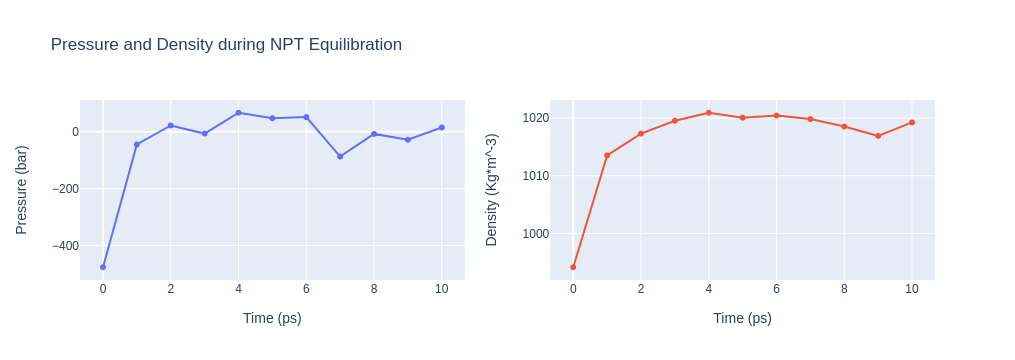

In [35]:
# Read pressure and density data from file 
from plotly import subplots

with open(output_npt_pd_xvg,'r') as pd_file:
    x,y,z = map(
        list,
        zip(*[
            (float(line.split()[0]),float(line.split()[1]),float(line.split()[2]))
            for line in pd_file 
            if not line.startswith(("#","@")) 
        ])
    )

plotly.offline.init_notebook_mode(connected=True)

trace1 = go.Scatter(
    x=x,y=y
)
trace2 = go.Scatter(
    x=x,y=z
)

fig = subplots.make_subplots(rows=1, cols=2, print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout']['xaxis1'].update(title='Time (ps)')
fig['layout']['xaxis2'].update(title='Time (ps)')
fig['layout']['yaxis1'].update(title='Pressure (bar)')
fig['layout']['yaxis2'].update(title='Density (Kg*m^-3)')

fig['layout'].update(title='Pressure and Density during NPT Equilibration')
fig['layout'].update(showlegend=False)

plotly.offline.iplot(fig)

In [38]:
# Create prop dict and inputs/outputs
prop = {
    'mdp':{
        #'nsteps':'500000' # 1 ns (500,000 steps x 2fs per step)
        #'nsteps':'5000' # 10 ps (5,000 steps x 2fs per step)
        'nsteps':'25000' # 50 ps (25,000 steps x 2fs per step)
    },
    'simulation_type':'free'
}

In [39]:
# output_gppmd_tpr = pdbCode+'_'+ligandCode + '_gppmd.tpr'
output_gppmd_tpr = f"../files/{ligandCode}/{pdbCode}_{ligandCode}_gppmd.tpr"


In [40]:
# Create and launch bb
grompp(input_gro_path=output_npt_gro,
       input_top_zip_path=output_genion_top_zip,
       output_tpr_path=output_gppmd_tpr,
       input_cpt_path=output_npt_cpt,
       properties=prop)

2021-09-08 16:03:10,786 [MainThread  ] [INFO ]  GROMACS Grompp 20191 version detected
2021-09-08 16:03:10,800 [MainThread  ] [INFO ]  Extracting: /home/didier/Documents/BARRADD_Things/SDHA_CADD/files/CHEMBL126/SDHA_CHEMBL126_genion_top.zip
2021-09-08 16:03:10,801 [MainThread  ] [INFO ]  to:
2021-09-08 16:03:10,802 [MainThread  ] [INFO ]  ['d8e9778d-0d0c-4dd6-b4b2-14f8e2d5d7c6/CHEMBL126_params.itp', 'd8e9778d-0d0c-4dd6-b4b2-14f8e2d5d7c6/CHEMBL126_posres.itp', 'd8e9778d-0d0c-4dd6-b4b2-14f8e2d5d7c6/ligand.top', 'd8e9778d-0d0c-4dd6-b4b2-14f8e2d5d7c6/p2g_Protein_chain_A.itp', 'd8e9778d-0d0c-4dd6-b4b2-14f8e2d5d7c6/p2g_Protein_chain_B.itp', 'd8e9778d-0d0c-4dd6-b4b2-14f8e2d5d7c6/posre_Protein_chain_A.itp', 'd8e9778d-0d0c-4dd6-b4b2-14f8e2d5d7c6/posre_Protein_chain_B.itp']
2021-09-08 16:03:10,802 [MainThread  ] [INFO ]  Unzipping: 
2021-09-08 16:03:10,803 [MainThread  ] [INFO ]  ../files/CHEMBL126/SDHA_CHEMBL126_genion_top.zip
2021-09-08 16:03:10,804 [MainThread  ] [INFO ]  To: 
2021-09-08 16:03

0